In [3]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
plt.rcParams['axes.linewidth'] = 0.5

In [4]:
RNA = pd.read_csv(f'{Project}/Results/Other_papers/Reid_etal.2017.Scientific_Reports/Tables/Exp_calc/v20230826/Reid_RNA_log2FC.tsv', sep='\t')
RPF = pd.read_csv(f'{Project}/Results/Other_papers/Reid_etal.2017.Scientific_Reports/Tables/Exp_calc/v20230826/Reid_RPF_log2FC.tsv', sep='\t')
FC = pd.merge(RNA, RPF, on=['gene_id','gene_name'])
data = pd.merge(pd.DataFrame({'gene_name':['Gls','Glul','Glud1','Got1','Got2','Gpt2','Bcat1','Bcat2','Eprs','Qars','Slc7a11','Slc1a3','Slc1a6','Slc25a13','Slc25a22','Slc38a1','Slc38a2','Slc1a5']}), FC, on='gene_name').set_index('gene_name')

display(data)

,gene_id,R_BD5a,R_BD5b,R_WD5a,R_WD5b,P_BD5a,P_BD5b,P_WD5a,P_WD5b
gene_name,,,,,,,,,
Gls,ENSMUSG00000026103,-1.452172,-0.839993,-1.872368,-1.923430,0.352067,0.095683,-0.272121,-0.684286
Glul,ENSMUSG00000026473,5.545063,5.230435,5.572704,5.771038,5.562123,4.606926,3.683591,3.454536
Glud1,ENSMUSG00000021794,0.937362,1.024408,1.294683,1.299615,2.057027,2.248697,1.477097,1.438212
Got1,ENSMUSG00000025190,0.535692,0.446412,0.148384,0.183980,1.186028,0.953676,-0.064935,-0.248514
Got2,ENSMUSG00000031672,0.631612,0.456422,0.700341,0.755234,0.531609,1.121829,0.256441,0.611071
Gpt2,ENSMUSG00000031700,0.364881,0.216822,0.714552,0.524694,-0.333336,-0.226396,1.100120,0.336693
Bcat1,ENSMUSG00000030268,-3.530746,-3.632998,-3.489031,-3.367323,-3.169876,-2.831029,-3.656452,-4.002263
Bcat2,ENSMUSG00000030826,3.119590,2.901822,3.528402,3.750210,3.743018,3.623164,3.207987,3.142855
Eprs,ENSMUSG00000026615,-0.199166,-0.139105,-0.629012,-0.778112,0.854653,1.192764,-0.060924,-0.001018


In [5]:
reps = ['a','b']

yvalues = []
yerrs = []
xpos = []
bar_c = []

xpos_std = 0
for gene in data.index:
    yvalues += [ np.mean([data.loc[gene,f'{LIB}_{Cond}{rep}'] for rep in reps]) for Cond in ['BD5','WD5'] for LIB in ['R','P'] ]
    yerrs += [ np.std([data.loc[gene,f'{LIB}_{Cond}{rep}'] for rep in reps]) for Cond in ['BD5','WD5'] for LIB in ['R','P'] ]

    xpos += list(np.array(range(4)) + xpos_std)
    xpos_std += 4.5

    bar_c += ['#CC6600','#CC6600','#FFF9F3','#FFF9F3']


sct_xpos = [xp for xp in xpos for rep in reps]
sct_ypos = [data.loc[gene,f'{LIB}_{Cond}{rep}'] for gene in data.index for Cond in ['BD5','WD5'] for LIB in ['R','P'] for rep in reps]
sct_c = [c for c in bar_c for rep in reps]

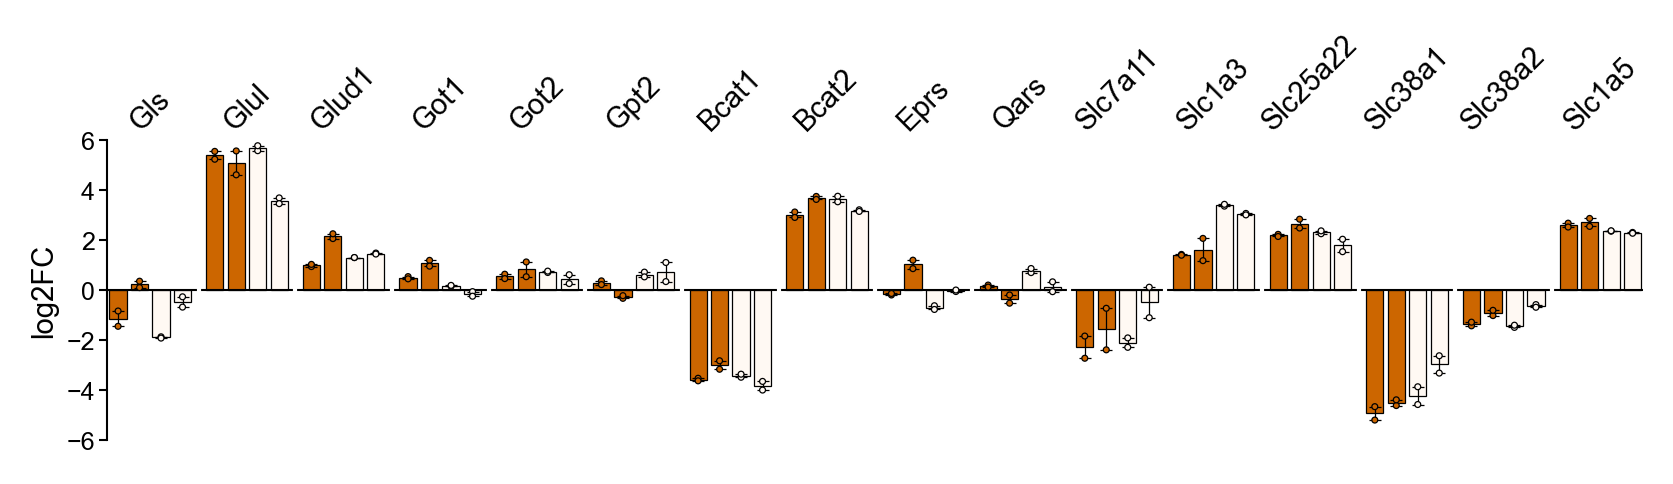

<Figure size 640x480 with 0 Axes>

In [13]:
err_kw = dict(lw=0.3, capsize=1.5, capthick=0.3)

sF = 1 # Size factor
wgap = 0.3
hgap = 0.6
nrow, ncol = 1, 1

fs_w = ncol*sF + (ncol-1)*wgap*sF
fs_h = nrow*sF + (nrow-1)*hgap*sF

fig = plt.figure(figsize=( fs_w*0.32*16, fs_h*1 ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    left=0, right=1, bottom=0, top=1,
                    wspace=wgap, hspace=hgap)

ax = fig.add_subplot(grid[0,0])

v1 = ax.bar(xpos,
            yvalues,
            width= 0.8,
            edgecolor='k', lw=0.3,
            color=bar_c, 
            yerr = yerrs, error_kw=err_kw)
ax.scatter(sct_xpos, sct_ypos,
           c=sct_c, s=2,
           lw=0.3, edgecolors='k',
           zorder=3)
ax.axhline(0, c='k', lw=0.5)
for x in [3.75 + 4.5 * i for i in range(len(data))]:
    ax.axvline(x, c='w', lw=1)

ax.set_xlim(xpos[0]-0.5, xpos[-1]+0.5)
ax.set_ylim(-6,6)
ax.set_xticks([])
ax.tick_params(width=0.5, length=2, pad=1)

ax.set_ylabel('log2FC', labelpad=2)

xp = 1.5
for gene in data.index:
    ax.text(xp, 6.2, gene, ha='center', va='bottom', fontsize=7, rotation=45)
    xp += 4.5


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)


plt.savefig('Reid_Glu-related_logFC_barplot2.pdf', bbox_inches='tight')
plt.show()
plt.clf()